In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
base_dir = r'C:\Users\aspk1\Videos\datasets'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [3]:
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)
print("Test directory:", test_dir)

Train directory: C:\Users\aspk1\Videos\datasets\train
Validation directory: C:\Users\aspk1\Videos\datasets\valid
Test directory: C:\Users\aspk1\Videos\datasets\test


In [4]:
csv_file_path = r'D:\DOCS\III YEAR PROJECTS\CSP PROJECT\Pesto_Data.csv'
disease_info = pd.read_csv(csv_file_path)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Model definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

# Re-train or Evaluate
history =model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=3,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.2f}")


Found 68727 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


c:\Users\aspk1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


c:\Users\aspk1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2147/2147 ━━━━━━━━━━━━━━━━━━━━ 1279s 594ms/step - accuracy: 0.3152 - loss: 2.4428 - val_accuracy: 0.7735 - val_loss: 0.7689
Epoch 2/3
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.8750 - loss: 0.3256 - val_accuracy: 0.7500 - val_loss: 0.5108
Epoch 3/3


c:\Users\aspk1\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2147/2147 ━━━━━━━━━━━━━━━━━━━━ 769s 358ms/step - accuracy: 0.7884 - loss: 0.6810 - val_accuracy: 0.8234 - val_loss: 0.5967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.0000e+00 - loss: 896.7747
Test Accuracy: 0.00


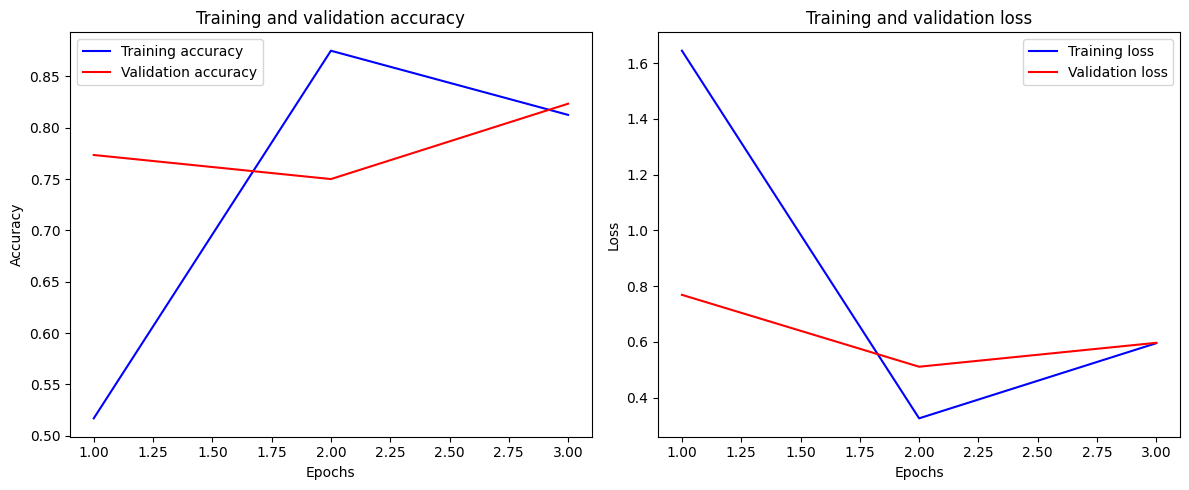

In [12]:
# Plot training & validation accuracy values
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Create a figure with subplots
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Ensure the plot is displayed
    plt.tight_layout()  # To adjust subplots for better visibility
    plt.show()

# Call the function to plot graphs
plot_history(history)


In [9]:

# Print accuracy and loss tables
def print_accuracy_loss_tables(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    data = {
        'Epoch': epochs,
        'Training Accuracy': history.history['accuracy'],
        'Validation Accuracy': history.history['val_accuracy'],
        'Training Loss': history.history['loss'],
        'Validation Loss': history.history['val_loss']
    }
    df = pd.DataFrame(data)
    print(df)

# Display the accuracy and loss tables
print_accuracy_loss_tables(history)

   Epoch  Training Accuracy  Validation Accuracy  Training Loss  \
0      1           0.516981             0.773452       1.645028   
1      2           0.875000             0.750000       0.325599   
2      3           0.812505             0.823372       0.595318   

   Validation Loss  
0         0.768874  
1         0.510848  
2         0.596659  


In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.2f}")

# Prediction and visualization with CSV data integration
def predict_and_visualize(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    
    predicted_label = class_labels[predicted_class]
    
    # Fetch disease information from the CSV
    disease_info_row = disease_info[disease_info['Disease'] == predicted_label]
    
    if not disease_info_row.empty:
        disease_details = disease_info_row.iloc[0]
        info_str = f"Disease: {disease_details['Disease']}\n"
        info_str += f"Best Pesticides: {disease_details['Best_pesticides']}\n"
        info_str += f"Worst Pesticides: {disease_details['Worst_pesticides']}\n"
    else:
        info_str = "No additional information available."
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\n{info_str}")
    plt.axis('off')  
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.0000e+00 - loss: 907.6862
Test Accuracy: 0.00


In [11]:
sample_image_path = r"C:\Users\aspk1\Videos\datasets\train\Grape___Black_rot\815b764f-03af-4f27-9e7a-ceaa2a56c0e5___FAM_B.Rot 3193_flipLR.JPG"
predict_and_visualize(sample_image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


KeyError: 'Best_pesticides'

In [123]:
# Save the model to an .h5 file
model.save('D:\DOCS\III YEAR PROJECTS\CSP PROJECT\Pesticide_Sprayer.h5')


In [86]:
# Load and check the CSV file
csv_file_path = 'D:\DOCS\III YEAR PROJECTS\CSP PROJECT\Pesto_Data.csv'
disease_info = pd.read_csv(csv_file_path)

# Print the column names to verify
print("Columns in the CSV file:", disease_info.columns)

Columns in the CSV file: Index(['Disease', 'Best_pesticides', 'Worst_pesticides'], dtype='object')
